<a href="https://colab.research.google.com/github/Meisam-Heidari/reCLAIM-2019-Competition/blob/master/Classification_Meisam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ML Libraries
from sklearn.model_selection import train_test_split
# TF 2.0
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


# Classification DataSet

## Loading

In [0]:
#df_clas_header_test = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - test.txt")
df_clas_header_train = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - train.txt")
#df_clas_header_validation = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Header - validation.txt")
df_clas_well_class_train = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Well_class_train.txt")
#df_clas_well_class_validation = pd.read_csv("/gdrive/My Drive/reCLAIM 2019 Competition/classification_comp_starter_kit/classification_comp_starter_kit/Well_class_validate.txt")

In [0]:
#df_clas_header_test = pd.read_csv("classification/Header - test.txt")
#df_clas_header_train = pd.read_csv("classification/Header - train.txt")
#df_clas_header_validation = pd.read_csv("classification/Header - validation.txt")
#df_clas_well_class_train = pd.read_csv("classification/Well_class_train.txt")
#df_clas_well_class_validation = pd.read_csv("classification/Well_class_validate.txt")

In [0]:
#df_clas_header_test.head(2)


In [0]:
#df_clas_well_class_train.head(2)

In [0]:
#df_clas_well_class_validation.head(2)

In [0]:
#headers = []
#for i in range(len(df_clas_header_train.columns)):
#  headers.append([df_clas_header_train.columns[i],df_clas_header_validation.columns[i],df_clas_header_test.columns[i]])
#headers

## Header Test file

In [0]:
#df_clas_header_test.shape

In [0]:
#df_clas_header_test.nunique()

In [0]:
#df_clas_header_test.info()

## Header Validation File

In [0]:
#df_clas_header_validation.shape

In [0]:
#df_clas_header_validation.nunique()

In [0]:
#df_clas_header_validation.info()

## Header train File

In [0]:
#df_clas_header_train.shape

In [0]:
#df_clas_header_train.nunique()

In [0]:
#df_clas_header_train.info()

## Well class train File

In [0]:
#df_clas_well_class_train.shape

In [0]:
#df_clas_well_class_train.nunique()

In [0]:
#df_clas_well_class_train.info()

In [0]:
#df_clas_well_class_train.head()

In [0]:
#df_clas_well_class_train.describe()

## Well Class Validation File

In [0]:
#df_clas_well_class_validation.shape

In [0]:
#df_clas_well_class_validation.nunique()

In [0]:
#df_clas_well_class_validation.info()

In [0]:
#df_clas_well_class_validation.head()

In [0]:
#df_clas_well_class_validation.describe()

# Merge Data

In [27]:
df_clas_well_class_train['EPAssetsId'].duplicated().sum(), df_clas_header_train['EPAssetsId'].duplicated().sum()

(0, 0)

In [0]:
df_train = pd.merge(df_clas_well_class_train, df_clas_header_train, on = ['EPAssetsId','EPAssetsId'] )

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 92 columns):
EPAssetsId                 588673 non-null int64
well_status                588673 non-null object
well_status_code           588673 non-null int64
Province                   588673 non-null object
LicenceNumber              588673 non-null object
UWI                        588673 non-null object
CurrentOperator            588673 non-null object
CurrentOperatorParent      588673 non-null int64
CurrentOperatorID          124038 non-null float64
Licensee                   588673 non-null object
LicenseeParentCompany      588673 non-null int64
LicenseeID                 8537 non-null float64
LicenceDate                588664 non-null object
WellType                   588673 non-null object
WellTypeStandardised       588673 non-null object
ConfidentialReleaseDate    310703 non-null object
SurfAbandonDate            149148 non-null object
WellName                   588206 non-null 

In [0]:
#df_clas_well_class_validation['EPAssetsId'].duplicated().sum(), df_clas_header_validation['EPAssetsId'].duplicated().sum()

In [0]:
#df_validation = pd.merge(df_clas_well_class_validation, df_clas_header_validation, on = ['EPAssetsId','EPAssetsId'] )

In [0]:
#df_validation.info()

In [0]:
# Basic EDA


# Feature Engineering
- Correlation
- Score Gain
- ?

In [33]:
features_lst = list(df_train.columns)
len(features_lst)

92

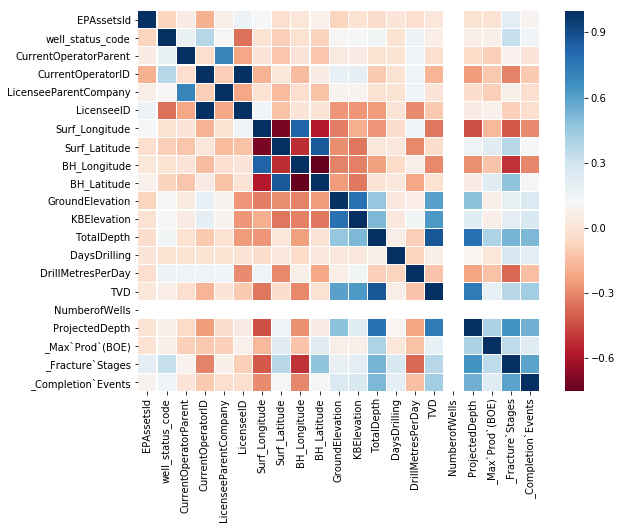

In [34]:
corr = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

In [35]:
corr[corr>0.5] 

,EPAssetsId,well_status_code,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events
EPAssetsId,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well_status_code,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorParent,NaN,NaN,1.000000,NaN,0.702048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorID,NaN,NaN,NaN,1.000000,NaN,0.999369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeParentCompany,NaN,NaN,0.702048,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeID,NaN,NaN,NaN,0.999369,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.829301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.865559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,0.829301,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.865559,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
corr[corr<-0.5] 

,EPAssetsId,well_status_code,CurrentOperatorParent,CurrentOperatorID,LicenseeParentCompany,LicenseeID,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,NumberofWells,ProjectedDepth,_Max`Prod`(BOE),_Fracture`Stages,_Completion`Events
EPAssetsId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
well_status_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorParent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrentOperatorID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeParentCompany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LicenseeID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.706404,NaN,-0.574681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Surf_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.706404,NaN,-0.520553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BH_Longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.520553,NaN,-0.751274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.508717,NaN
BH_Latitude,NaN,NaN,NaN,NaN,NaN,NaN,-0.574681,NaN,-0.751274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Lets Simplify the dataset

In [0]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',300)

In [38]:
df_train[df_train['well_status']=='Abandoned'][df_train['SurveySystem']=='DLS']['SurveySystem'].nunique()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1

In [39]:
df_train[df_train['OSArea']=='Cold Lake'][df_train['well_status'] =='Active'].head(50).transpose()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,1,20,46,171,398,414,445,469,470,488,589,620,636,640,641,871,991,1079,1089,1101,1147,1156,1158,1164,1281,1351,1385,1425,1553,1560,1617,1720,2035,2051,2065,2148,2213,2418,2427,2499,2542,2568,2721,2817,2829,2916,3248,3268,3285,3318
EPAssetsId,2341273,2438366,2357291,2582033,2419158,2418293,2421081,2437657,2616979,2418698,2413385,2391245,2418445,2345605,2411674,2336133,2405769,2616081,2397457,2574718,2421291,2421176,2610348,2410522,2420220,2359040,2602326,2374377,2604688,2616898,2405387,2348781,2433116,2427220,2427136,2404819,2420541,2432119,2419118,2432121,2427162,2397943,2420098,2616490,2391260,2335221,2419643,2349671,2420052,2411642
well_status,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active,Active
well_status_code,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Province,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta,Alberta
LicenceNumber,0419701,0280194,0130457,0471092,0132578,0184632,0112735,0424670,0417232,0253325,0449080,0276078,0130575,0383575,0454492,0447420,0181353,0489697,0464369,0465438,0135451,0134595,0487585,0227409,0114401,0426211,0483133,0419168,0453907,0088170,0444220,0115338,0343463,0409631,0378195,0419310,0131563,0378782,0126624,0378784,0412973,0188305,0354902,0491436,0277245,0421232,0314372,0095347,0291809,0356857
UWI,100011505407W400,100123306805W400,100092005603W402,102010105702W400,100041906503W402,103150606503W400,108112206504W400,100050306804W400,100140705405W402,104030906503W400,100121306408W400,100102006108W400,105110706503W400,100130605501W400,1AA131606404W402,100023205306W400,100101306310W400,100043306306W403,102032906207W400,102090806309W400,106012606504W400,104052306504W400,100080206506W400,107131706403W400,110041306504W400,100152805606W400,102130706101W402,100072305805W400,104052406309W402,100071806705W402,100070906309W400,100092105505W404,100051306704W400,103142806604W400,103072106604W400,102151806308W400,105141406504W402,102030106703W400,1W0121806503W400,104030106703W400,104072206604W400,100112406210W403,104081206504W400,102131406506W400,100142206108W400,100110705302W400,100030806504W400,100151405506W402,110031206504W400,109143506403W400
CurrentOperator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,West Lake Energy Corp.,Canadian Natural Resources Limited,No Current Operator,Imperial Oil Resources Limited,Imperial Oil Resources Limited,No Current Operator,Husky Oil Operations Limited,Imperial Oil Resources Limited,Devon Canada Corporation,Vantage Point Resources Inc.,Imperial Oil Resources Limited,Devon Canada Corporation,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Imperial Oil Resources Limited,No Current Operator,Osum Production Corp.,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Baytex Energy Ltd.,Canadian Natural Resources Limited,Canadian Natural Resources Limited,No Current Operator,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Limited,Imperial Oil Resources Limited,Canadian Natural Resources Li

In [40]:
df_train.nunique()

EPAssetsId                 588673
well_status                     3
well_status_code                3
Province                        4
LicenceNumber              485571
UWI                        582171
CurrentOperator              1468
CurrentOperatorParent        1114
CurrentOperatorID             666
Licensee                     4307
LicenseeParentCompany        3257
LicenseeID                    374
LicenceDate                 19975
WellType                      149
WellTypeStandardised           65
ConfidentialReleaseDate     23392
SurfAbandonDate             22643
WellName                   471104
WellNameAmended            471104
Formation                     591
Field                        1997
Pool                        11028
SurveySystem                    2
Surf_Location              361759
Surf_Township                 128
Surf_Meridian                  11
Surf_Range                     37
Surf_Section                   38
Surf_LSD                       18
Surf_Longitude

In [41]:
# List of columns with too many null values: must be dropped
null_cols_to_drop = list(df_train.isnull().sum()[df_train.isnull().sum()>450000].index)
null_cols_to_drop

['CurrentOperatorID',
 'LicenseeID',
 'UnitID',
 'UnitName',
 'Municipality',
 'CompletionDate',
 '_Fracture`Stages',
 '_Completion`Events']

# Not important Columns to drop

- Cant drop any of the provinces because there is a good representation of them in the test dataset

In [42]:
df_train['Province'].value_counts()

Alberta             434043
Saskatchewan        115815
British Columbia     30278
Manitoba              8537
Name: Province, dtype: int64

In [0]:
#df_clas_header_test['Province'].value_counts()

In [44]:
pd.unique(df_train['SurveySystem'])

array(['DLS', 'NTS'], dtype=object)

In [45]:
df_train['Province'][df_train['SurveySystem']=='NTS'].value_counts()

British Columbia    21478
Name: Province, dtype: int64

In [0]:
#df_clas_header_test['Province'][df_train['SurveySystem']=='NTS'].value_counts()

# Colomns with similarities to drop

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 92 columns):
EPAssetsId                 588673 non-null int64
well_status                588673 non-null object
well_status_code           588673 non-null int64
Province                   588673 non-null object
LicenceNumber              588673 non-null object
UWI                        588673 non-null object
CurrentOperator            588673 non-null object
CurrentOperatorParent      588673 non-null int64
CurrentOperatorID          124038 non-null float64
Licensee                   588673 non-null object
LicenseeParentCompany      588673 non-null int64
LicenseeID                 8537 non-null float64
LicenceDate                588664 non-null object
WellType                   588673 non-null object
WellTypeStandardised       588673 non-null object
ConfidentialReleaseDate    310703 non-null object
SurfAbandonDate            149148 non-null object
WellName                   588206 non-null 

In [0]:
#pd.unique(df_train[df_train['well_status']=='Abandoned']['Municipality'])

In [0]:
#pd.unique(df_train[df_train['well_status']=='Active']['Municipality'])

In [50]:
useless_cols = ['UWI',
                'WellType',
 'ConfidentialReleaseDate',
 'WellName',
 'SurveySystem',
 'Surf_Location',
 'Surf_Township',
 'Surf_Meridian',
 'Surf_Range',
 'Surf_Section',
 'Surf_LSD',
 'Surf_Longitude',
 'Surf_Latitude',
 'Surf_TownshipRange',
 'Surf_QuarterUnit',
 'Surf_Unit',
 'Surf_Block',
 'Surf_NTSMapSheet',
 'Surf_Series',
 'Surf_Area',
 'Surf_Sheet',
 'Surf_QuarterSection',
 'BH_Location',
 'BH_TownshipRange',
 'BH_QuarterUnit',
 'BH_Unit',
 'BH_Block',
 'BH_NTSMapSheet',
 'BH_Series',
 'BH_Area',
 'BH_Sheet',
 'BH_QuarterSection',
 'BH_Longitude',
 'BH_Latitude',
 'BH_Township',
 'BH_Meridian',
 'BH_Range',
 'BH_Section',
 'BH_LSD',
 'GroundElevation',
 'KBElevation',
 'SurfaceOwner',
 'DrillingContractor',
 'SpudDate',
 'RigReleaseDate',
 'DaysDrilling',
 'DrillMetresPerDay',
 'Country',
 'RegulatoryAgency',
 'NumberofWells',
 'ProjectedDepth',
 'StatusSource',
 'UnitID',
 'UnitName',
 'UnitFlag',
 'Municipality',
 'CompletionDate',
 'Agent',
 '_Fracture`Stages',
 '_Completion`Events']
useless_cols[0],useless_cols[len(useless_cols)-1]

('UWI', '_Completion`Events')

In [0]:
overlaping_cols_to_drop =[
 'CurrentOperator',
 'CurrentOperatorParent',
 'Licensee',
 'LicenseeParentCompany',
 'WellType',
 'WellName',
 'OSArea']

df_test = pd.DataFrame(data=np.arange(92).reshape(1,92), columns=features_lst)
df_test

for i in range(len(overlaping_cols_to_drop)):
    if overlaping_cols_to_drop[i] in list(df_test.columns):
        df_test.drop(overlaping_cols_to_drop[i], axis = 1, inplace=True)

for i in range(len(useless_cols)):
    if useless_cols[i] in list(df_test.columns):
        df_test.drop(useless_cols[i], axis = 1, inplace=True)
        
for i in range(len(null_cols_to_drop)):
    if null_cols_to_drop[i] in list(df_test.columns):
        df_test.drop(null_cols_to_drop[i], axis = 1, inplace=True)
        
df_test.info()

In [52]:
for i in range(len(overlaping_cols_to_drop)):
    if overlaping_cols_to_drop[i] in list(df_train.columns):
        df_train.drop(overlaping_cols_to_drop[i], axis = 1, inplace=True)

for i in range(len(useless_cols)):
    if useless_cols[i] in list(df_train.columns):
        df_train.drop(useless_cols[i], axis = 1, inplace=True)
        
for i in range(len(null_cols_to_drop)):
    if null_cols_to_drop[i] in list(df_train.columns):
        df_train.drop(null_cols_to_drop[i], axis = 1, inplace=True)
        
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 25 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null object
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null object
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null object
TVD                     552435 non-null float64
WellProfile             588673 non-null obj

In [0]:
df_train['LicenceDate'] = pd.to_datetime(df_train['LicenceDate'].str.split(' ', 0).str[0])
df_train['SurfAbandonDate'] = pd.to_datetime(df_train['SurfAbandonDate'].str.split(' ', 0).str[0])
df_train['FinalDrillDate'] = pd.to_datetime(df_train['FinalDrillDate'].str.split(' ', 0).str[0])
df_train['StatusDate'] = pd.to_datetime(df_train['StatusDate'].str.split(' ', 0).str[0])

In [54]:
# calculating the number of days between getting the license and reporting the status
days_to_stat= df_train['StatusDate']-df_train['LicenceDate']
days_to_stat.isnull().sum()

71

In [55]:
days_to_stat[days_to_stat<pd.Timedelta('0 days +00:00:00')] = np.nan
days_to_stat.isnull().sum()

986

In [0]:
# Storing the number of days as a floating number in a new columns
df_train['Days_to_StatusDate'] = days_to_stat.dt.days

In [57]:
# Check to see if we have same number of null values before and after creating the column
days_to_stat.isnull().sum() , df_train['Days_to_StatusDate'].isnull().sum() 

(986, 986)

In [0]:
df_train.replace('NaN',np.nan ,inplace=True)
df_train.replace('None',np.nan ,inplace=True)

In [59]:
df_train.head(5)

,EPAssetsId,well_status,well_status_code,Province,LicenceNumber,LicenceDate,WellTypeStandardised,SurfAbandonDate,WellNameAmended,Formation,Field,Pool,TotalDepth,LaheeClass,Confidential,OSDeposit,FinalDrillDate,TVD,WellProfile,WellSymbPt1,PSACAreaCode,PSACAreaName,StatusDate,_Max`Prod`(BOE),_Open`Hole,Days_to_StatusDate
0,2314251,Suspended,2,Alberta,0133238,1988-03-22,Gas,NaT,Cve Edson 12-18-49-16,Mannville,Edson,Commingled Pool 017,3044.0,Development,Non-Confidential,Not Applicable,1993-04-05,3044.00,Vertical,Gas,AB2,Foothills Front,2003-12-01,NaN,CasedCompleted,5732.0
1,2341273,Active,1,Alberta,0419701,2010-04-09,Bitumen,NaT,Cnrl 1b St. Paul 1-15-54-7,Dina,Derwent,Lower Grand Rapids,785.0,Development,Non-Confidential,Lower Grand Rapids,2010-07-27,628.77,Directional,Oil,AB4,East Central Alberta,2010-08-31,95.38271,CasedCompleted,144.0
2,1086314,Abandoned,0,Saskatchewan,11E153,2011-05-16,Oil,NaT,HUSKY WESTHAZEL A2-31-50-22,Paleozoic,Westhazel General Petroleum,Westhazel General Petroleum,621.0,Development,Non-Confidential,Not Applicable,2011-08-24,621.00,Vertical,Oil,SK1,Central Saskatchewan,2011-05-16,NaN,CasedCompleted,0.0
3,2210835,Abandoned,0,Alberta,0088786,1981-02-04,Oil,NaT,Caltex_Res Provost 10-21-37-1,Unspecified,Provost,Upper Mannville A,830.0,Outpost,Non-Confidential,Not Applicable,1981-02-09,830.00,Vertical,Oil,AB4,East Central Alberta,1987-02-19,NaN,CasedCompleted,2206.0
4,40946,Suspended,2,British Columbia,31827,2015-11-30,Unspecified,NaT,Leucrotta Two Rivers 16-30-082-16,Unspecified,Other Areas,Unspecified,1977.2,Outpost,Non-Confidential,NaN,NaT,NaN,Vertical,Other,BC2,Northern British Columbia,2016-07-14,NaN,CasedCompleted,227.0


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 26 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null datetime64[ns]
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null datetime64[ns]
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null datetime64[ns]
TVD                     552435 non-null float64
WellProfile        

In [61]:
df_train.nunique()

EPAssetsId              588673
well_status                  3
well_status_code             3
Province                     4
LicenceNumber           485571
LicenceDate              19975
WellTypeStandardised        65
SurfAbandonDate          22643
WellNameAmended         471104
Formation                  591
Field                     1997
Pool                     11028
TotalDepth               25690
LaheeClass                  17
Confidential                 5
OSDeposit                   13
FinalDrillDate           27257
TVD                      96613
WellProfile                  5
WellSymbPt1                  5
PSACAreaCode                15
PSACAreaName                15
StatusDate               26245
_Max`Prod`(BOE)          86073
_Open`Hole                   2
Days_to_StatusDate       20714
dtype: int64

Abandoned    248127
Active       234232
Suspended    106314
Name: well_status, dtype: int64

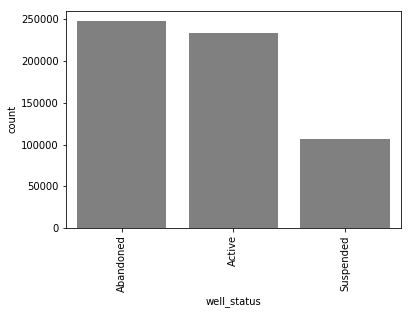

In [62]:
# univariate plots
fig1,axes=plt.subplots(nrows=1,ncols=1)
sns.countplot(df_train['well_status'], order = df_train.well_status.value_counts().
              index ,color = '0.5' )
plt.xticks(rotation = 90)
;
df_train['well_status'].value_counts()

Active       51302
Abandoned    38722
Suspended    25791
Name: well_status, dtype: int64

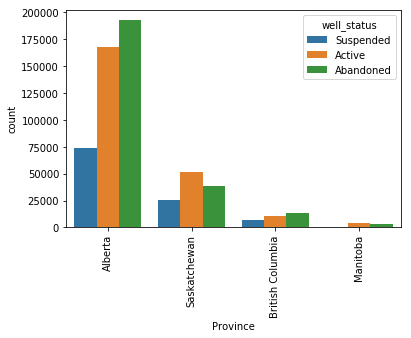

In [63]:
# univariate plots
# doesnt seemto be a good classifier, especially considering there is a finer geographical 
# classifier in PSACArea parameters
# Leave it out.
fig1,axes=plt.subplots(nrows=1,ncols=1)
sns.countplot(df_train['Province'], order = df_train.Province.value_counts().
              index , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['Province']=='Saskatchewan']['well_status'].value_counts()

Development                 378830
New Pool Wildcat             56207
Outpost                      47456
Oil Sands Evaluation         30549
Deeper Pool Test             21679
New Field Wildcat            17931
Development Service Well      9543
Test Hole                     8825
Other                         6349
Unspecified                   5663
Re-entry                      2822
Experimental                  2443
Confidential                   345
Potash Test Hole                14
Shallower Pool Test              8
Non Issued Licence               8
Deeper Pool Wildcat              1
Name: LaheeClass, dtype: int64

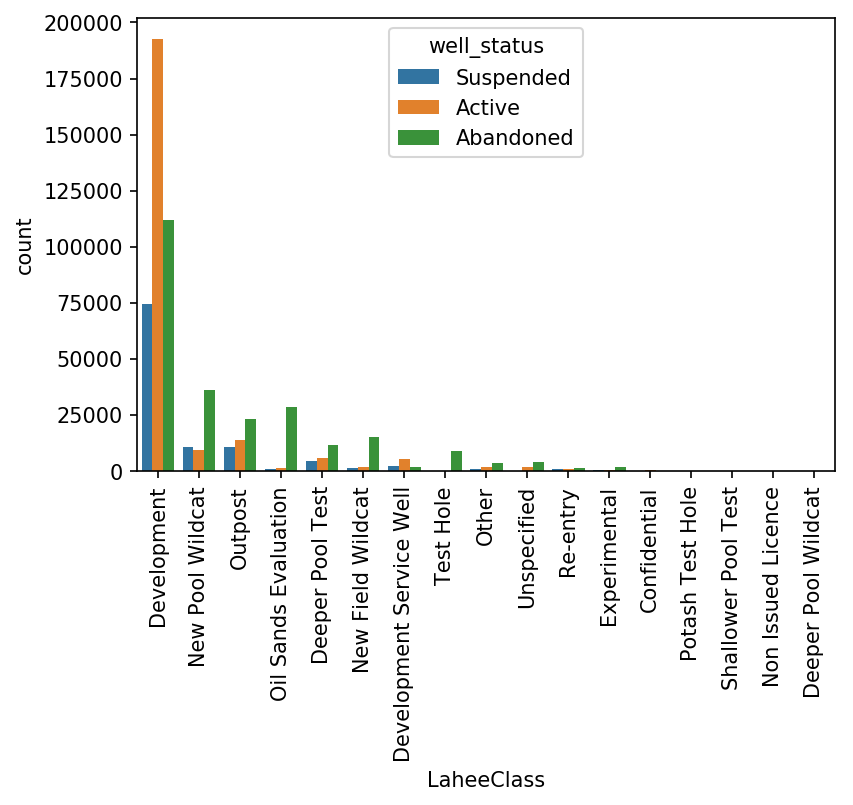

In [64]:
# univariate plots
# looks like a great identifier for abandoned wells. If the LaheeClass != Developmet, 
# there is a 64% chance that the well is abandoned
# Add 'Development Service Well' to that as well
# Use it!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['LaheeClass'], order = df_train.LaheeClass.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
# df_train[df_train['LaheeClass']!='Development']['well_status'].value_counts()/(136095+41801+31947)
df_train['LaheeClass'].value_counts()

Active       9954
Abandoned    6451
Suspended    1440
Name: well_status, dtype: int64

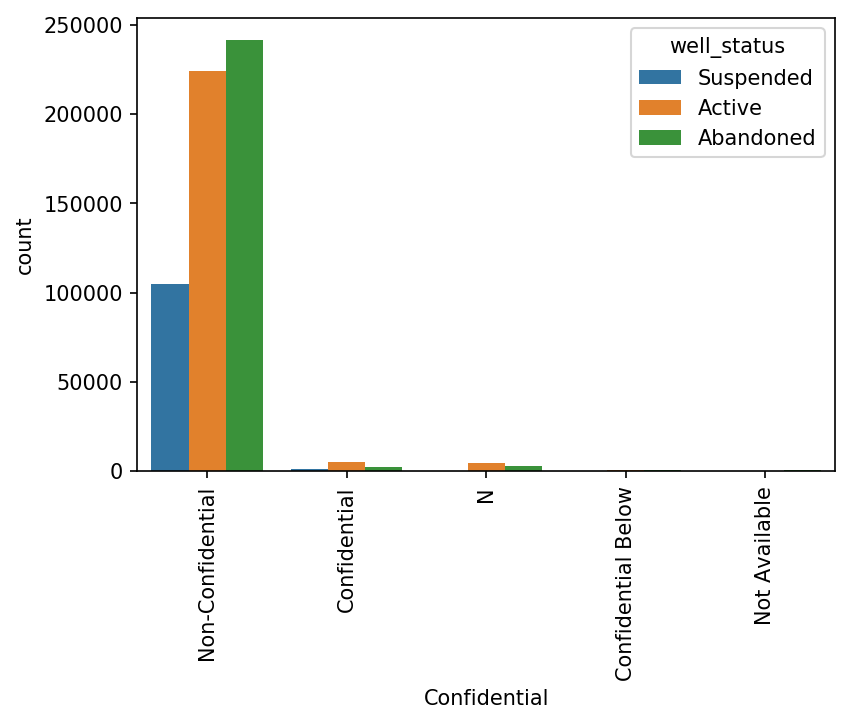

In [65]:
# univariate plots
# doesnt seem to be a good classifier. 
# leave it out
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['Confidential'], order = df_train.Confidential.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train[df_train['Confidential']!='Non-Confidential']['well_status'].value_counts()

Not Applicable          528084
Wabiskaw-Mcmurray        10111
Lower Grand Rapids        7836
Clearwater                5966
Upper Grand Rapids        4216
Bluesky-Gething           1261
Clearwater Undefined        93
Grosmont                    36
Pekisko Undefined           23
Middle Grand Rapids          3
Nisku                        3
Belloy                       1
Shunda                       1
Name: OSDeposit, dtype: int64

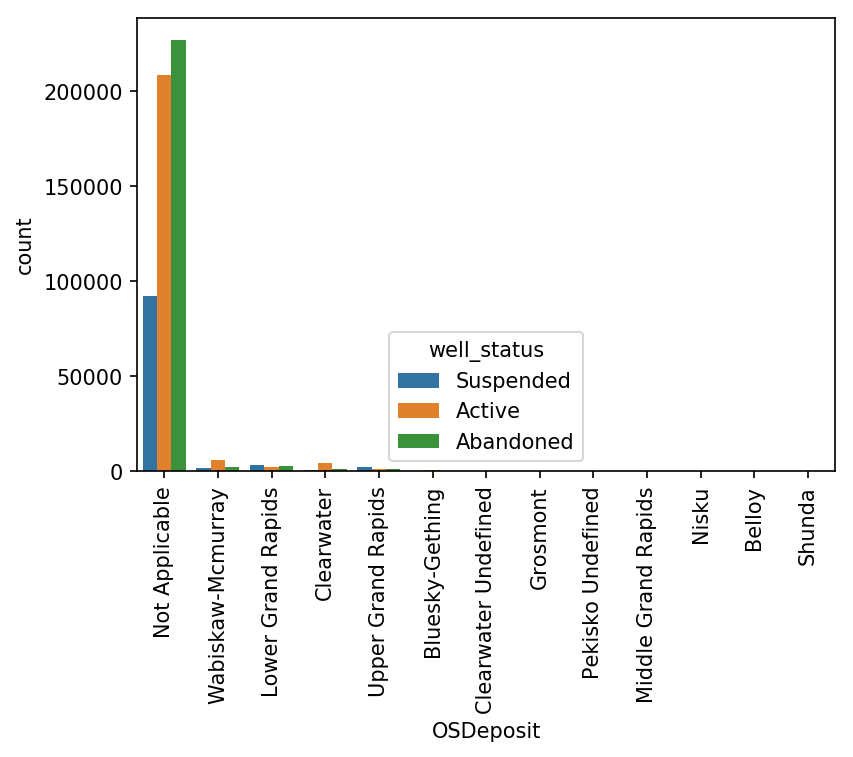

In [66]:
# univariate plot
# OSDeposit desnt seem to be a good dummy variable. df_train['OSDeposit']!= Not Applicable has 
# too few data points. The difference in ratio of Abondoned vs Active for 2 major classes is not that
# large(data in the next 2 cells)
# leave it out!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['OSDeposit'], order = df_train.OSDeposit.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['OSDeposit'].value_counts()

In [67]:
df_train[df_train['OSDeposit']=='Not Applicable']['well_status'].value_counts()/(528084)


Abandoned    0.430000
Active       0.395233
Suspended    0.174768
Name: well_status, dtype: float64

In [68]:
df_train[df_train['OSDeposit']!='Not Applicable']['well_status'].value_counts()/(588673-528084)

Active       0.421133
Abandoned    0.347439
Suspended    0.231428
Name: well_status, dtype: float64

Vertical          414139
Directional        91827
Horizontal         82592
Horizontal Leg        69
Slant                 46
Name: WellProfile, dtype: int64

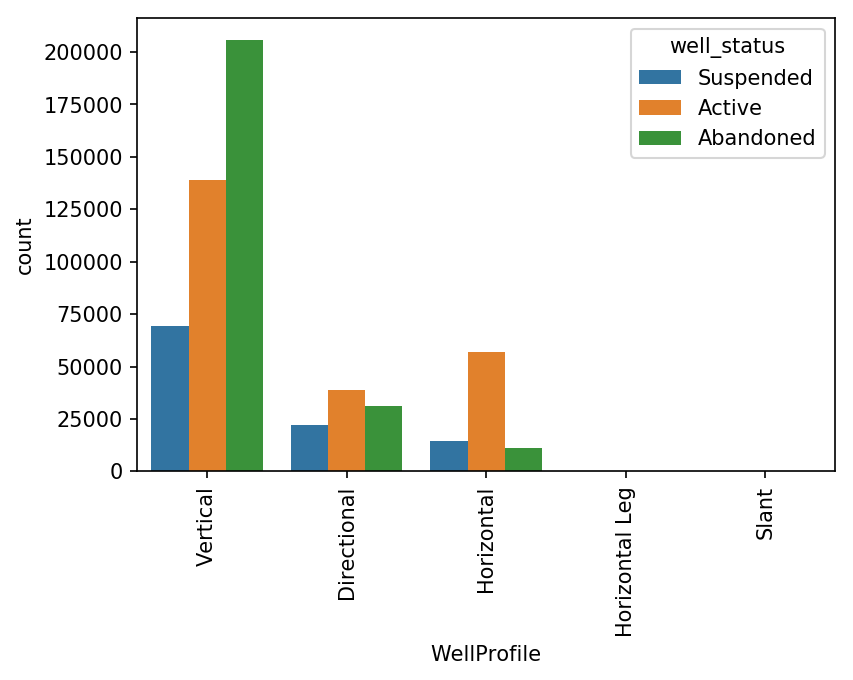

In [69]:
# univariate plots
# Awsome, probably need to drop last 2 categories, then use remaining 3 categories
# use it!
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['WellProfile'], order = df_train.WellProfile.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['WellProfile'].value_counts()


Other        199821
Gas          190117
Oil          178375
Injection     20356
Oil & Gas         4
Name: WellSymbPt1, dtype: int64

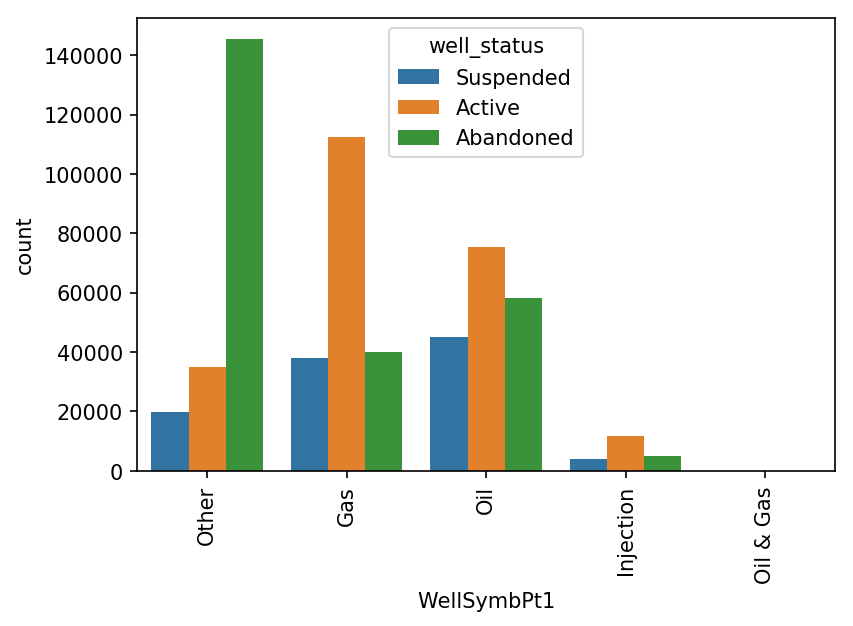

In [70]:
# univariate plots
# too good to dismiss. 
# Use it!

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['WellSymbPt1'], order = df_train.WellSymbPt1.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['WellSymbPt1'].value_counts()

AB3    134944
AB5     71561
AB6     66792
AB2     57989
AB4     55351
SK2     47632
AB7     44662
SK1     34430
SK3     33753
BC2     29852
MB       8537
AB1      2744
BC1       318
BC0        77
BC3        31
Name: PSACAreaCode, dtype: int64

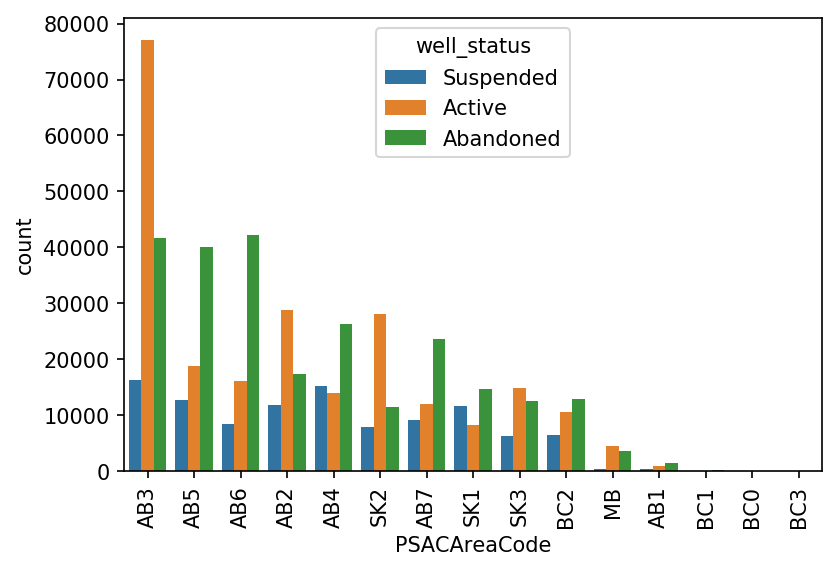

In [71]:
# univariate plots
# would be awsome to use all the categories as opposed to 0-1 dummies
# regardless, use it!

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['PSACAreaCode'], order = df_train.PSACAreaCode.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['PSACAreaCode'].value_counts()

Southeastern Alberta         134944
Central Alberta               71561
Northeastern Alberta          66792
Foothills Front               57989
East Central Alberta          55351
Southwestern Saskatchewan     47632
Northwestern Alberta          44662
Central Saskatchewan          34430
Eastern Saskatchewan          33753
Northern British Columbia     29852
Manitoba                       8537
Foothills                      2744
Southern British Columbia       318
Other British Columbia           77
Coastal British Columbia         31
Name: PSACAreaName, dtype: int64

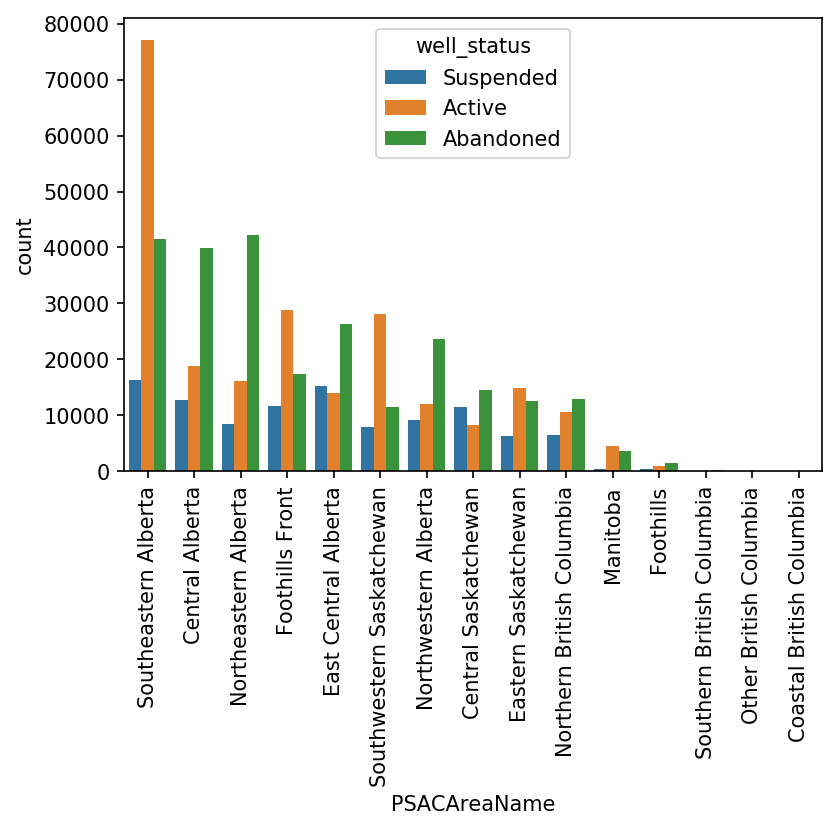

In [72]:
# univariate plots
# same as 'PSACAreaCode'.
# Drop it.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['PSACAreaName'], order = df_train.PSACAreaName.value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;
df_train['PSACAreaName'].value_counts()

''

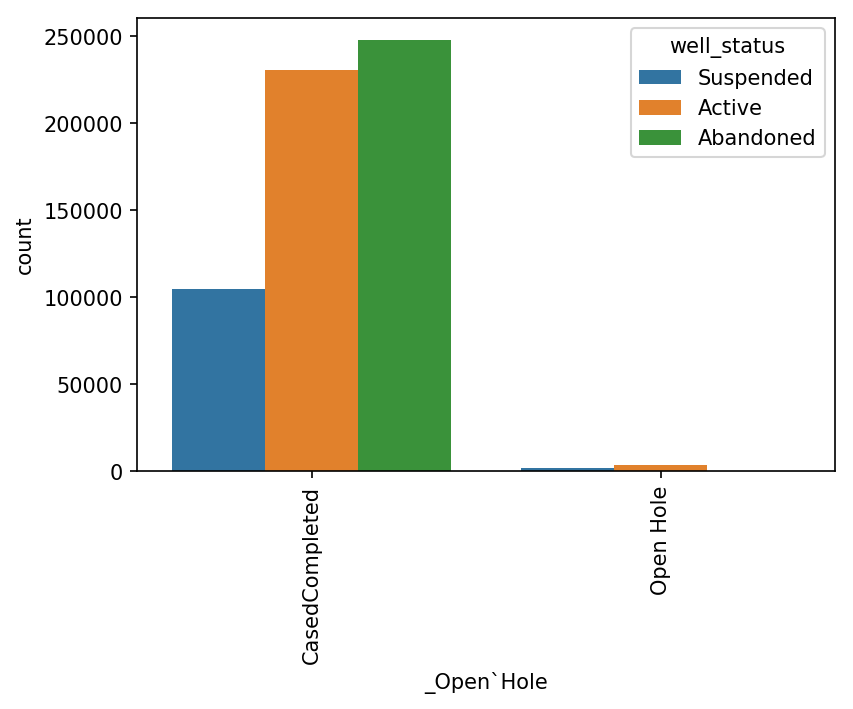

In [73]:
# univariate plots
# Not good!
# leave it out.
fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=150)
sns.countplot(df_train['_Open`Hole'], order = df_train['_Open`Hole'].value_counts().
              index  , hue=df_train['well_status'])
plt.xticks(rotation = 90)
;

''

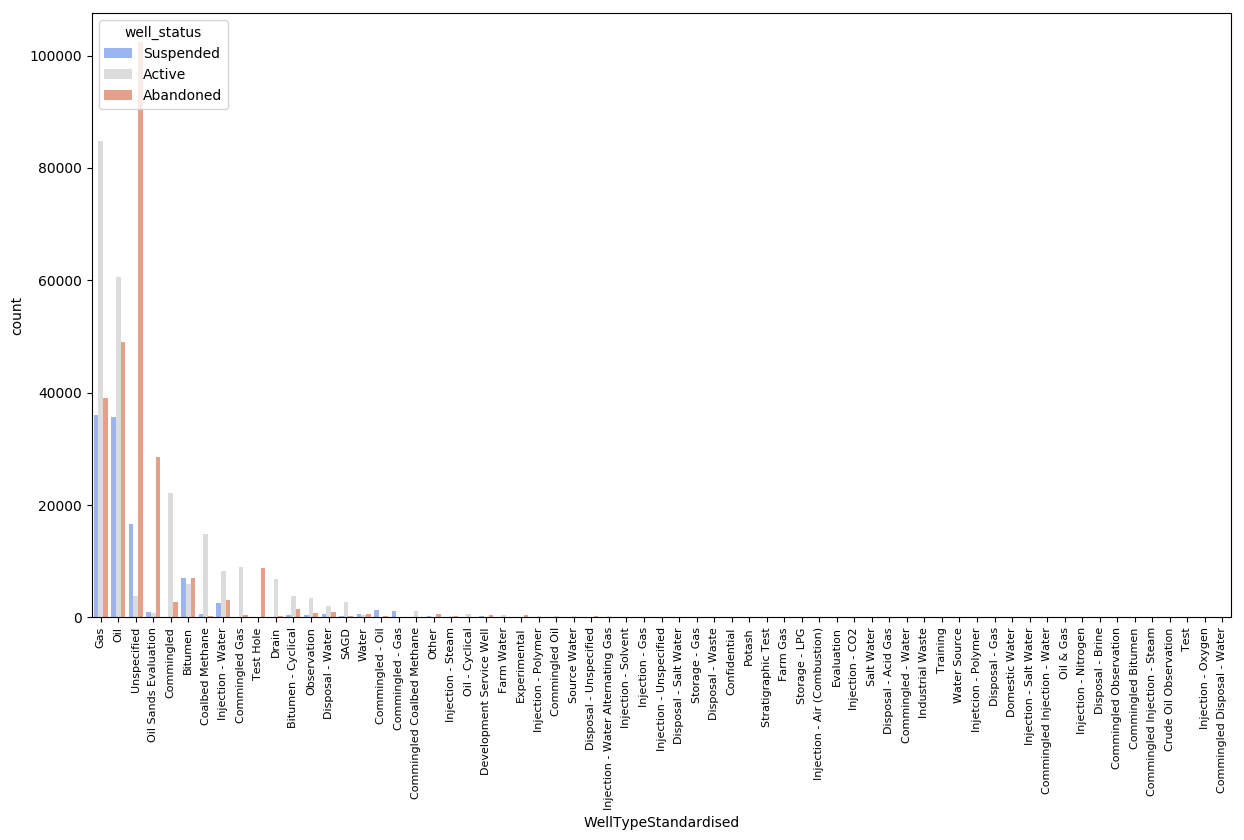

In [74]:
# This is a good one, but needs more work to clear and create a few categories from it.
# Add it to the second phase of machin learning maybe

fig1,axes=plt.subplots(nrows=1,ncols=1,dpi=100, figsize = [14.7,8])
sns.countplot(df_train['WellTypeStandardised'], order = df_train['WellTypeStandardised'].value_counts().
              index  , hue=df_train['well_status'], palette ='coolwarm')
fig1.tight_layout= True
plt.xticks(rotation = 90, fontsize = 8)
;

''

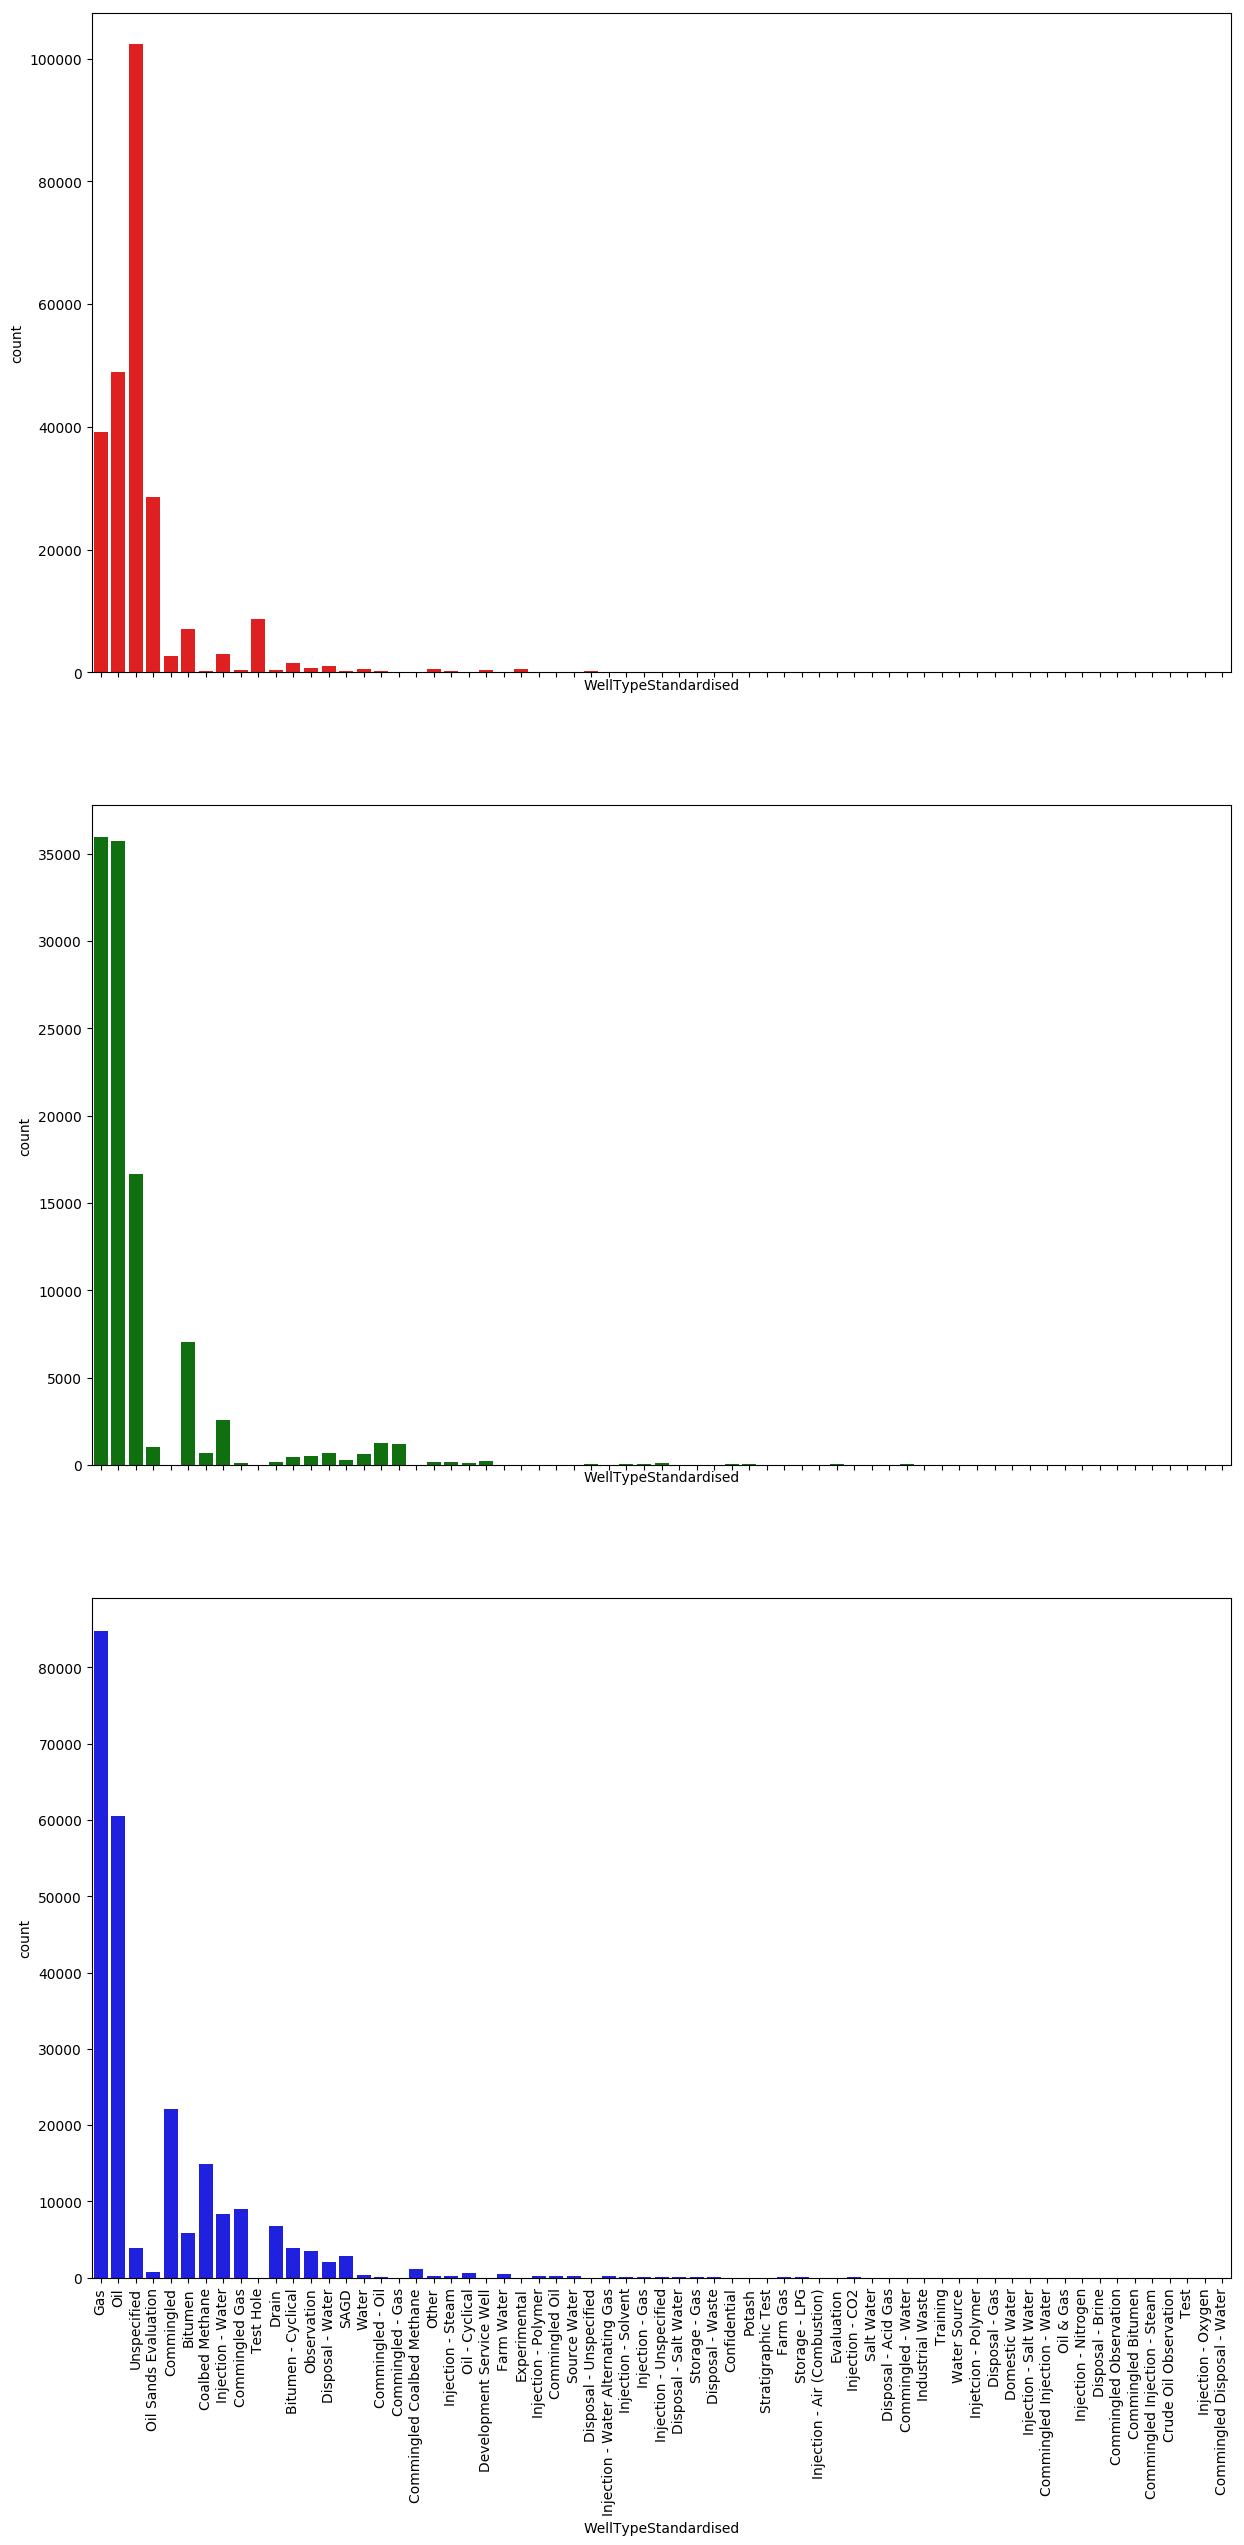

In [75]:
# univariate plots
# A better picture from the one above.
# 


fig1,(ax_Ab,ax_sus,ax_act) = plt.subplots(nrows=3,ncols=1,dpi=100, sharex=True, gridspec_kw={"height_ratios": (.33, .33, .34)}, figsize = [14.7,30])
sns.countplot(df_train['WellTypeStandardised'][df_train['well_status']=='Abandoned'], ax= ax_Ab, order = df_train['WellTypeStandardised'].value_counts().
              index ,orient= 'h', color = 'r' )
sns.countplot(df_train['WellTypeStandardised'][df_train['well_status']=='Suspended'], ax= ax_sus, order = df_train['WellTypeStandardised'].value_counts().
              index ,orient= 'h',color = 'g' )
sns.countplot(df_train['WellTypeStandardised'][df_train['well_status']=='Active'], ax= ax_act, order = df_train['WellTypeStandardised'].value_counts().
              index ,orient= 'h', color = 'b' )
fig1.tight_layout= True
plt.xticks(rotation = 90, fontsize = 10)
;

In [76]:
df_train['_Open`Hole'].value_counts()

CasedCompleted    583755
Open Hole           4918
Name: _Open`Hole, dtype: int64

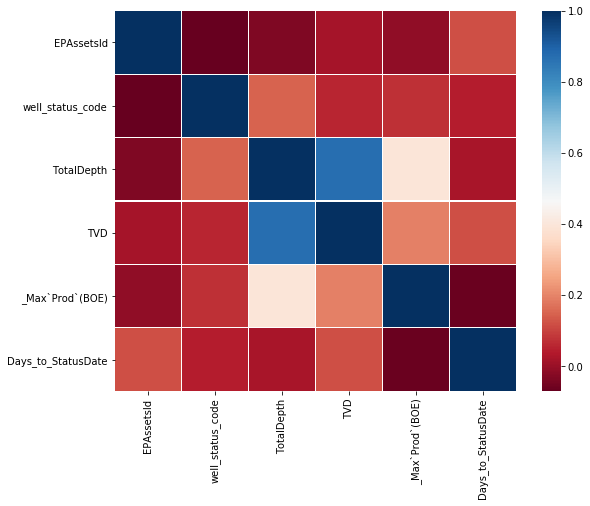

In [77]:
# Total Depth may be a usefull parameter. Further investigate. 
corr = df_train.corr()
plt.figure(figsize=(9,7))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    linecolor='white',
    linewidths=0.1,
    cmap="RdBu"
)
plt.show()

In [78]:
# License number is alpha numerical, can't include it in prediction
# Leave it out.
df_train['LicenceNumber'].sample(10)

579413     69F110
367753    0224171
456473    0288739
340613     55B008
224231     96C103
397907    0457599
252209    0376767
42941     0049805
81129       69424
282994    0085955
Name: LicenceNumber, dtype: object

In [79]:
# seems that almost all the wells with an existing SurfAbandonDate are abandoned
# Use it.

df_train[df_train['SurfAbandonDate'].notna()]['well_status'].value_counts()

Abandoned    147774
Suspended       853
Active          521
Name: well_status, dtype: int64

In [80]:
# it seems a large portion of abondoned wells (50% +) belong to "Unspecified" Pool category, while it has 
# a smaller role in suspended wells and even smaller one for Active wells. 
# considering more than 11,000 pool types, "Pool == Unspecified" should simplify this and 
# create a good dummy variable
# create and Use 'Pool' dummy as stated above


#---------------------
# Similar but much weaker relationship exists for Unspecified Formation. But to avoid inter-relationship between
# features, it is should not be considered
# Leave "Formation" out.
#--------------------
# Same strong relationship doesnt exist for Field names
# Leave "Field" out.


df_train[df_train['well_status']=='Abandoned']['Pool'].value_counts()/248127

Unspecified                           0.545696
Not Available                         0.041684
Commingled MFP9501                    0.025092
Commingled Pool 001                   0.011514
Lower Grand Rapids                    0.010543
Wabiskaw-Mcmurray                     0.009253
Viking                                0.005993
Upper Grand Rapids                    0.004997
Temporary Commingled                  0.004788
Clearwater                            0.004711
Bakken                                0.004469
Commingled Pool 002                   0.004389
Commingled MFP9515                    0.004296
Leduc A                               0.003663
Cardium                               0.003659
Sparky                                0.003603
Nisku A                               0.003559
Commingled Pool 003                   0.003506
Mannville                             0.003224
D-3                                   0.002994
Colony                                0.002833
Commingled Po

In [81]:
df_train[df_train['well_status']=='Active']['Pool'].value_counts()/234232

Commingled MFP9501                                    0.253667
Unspecified                                           0.056252
Commingled MFP9529                                    0.026431
Wabiskaw-Mcmurray                                     0.026282
Commingled Pool 001                                   0.025398
Temporary Commingled                                  0.023110
Clearwater                                            0.018418
Cardium                                               0.015096
Hatton Milk River-Medicine Hat                        0.013990
Dodsland Viking                                       0.011779
Commingled MFP9515                                    0.011548
Commingled Pool 002                                   0.010481
Viewfield Bakken                                      0.010101
Lower Grand Rapids                                    0.009367
Hatton Milk River                                     0.008577
Commingled Pool 003                                   0

In [82]:
df_train[df_train['well_status']=='Suspended']['Pool'].value_counts()/106314

Unspecified                         0.187087
Commingled MFP9501                  0.040418
Commingled Pool 001                 0.029479
Lower Grand Rapids                  0.028463
Upper Grand Rapids                  0.018963
Wabiskaw-Mcmurray                   0.015605
Cardium                             0.013375
Commingled Pool 002                 0.011889
Montney A                           0.011532
Commingled MFP9515                  0.008738
Commingled Pool 003                 0.008400
Hatton Milk River                   0.007845
McLaren                             0.007130
Colony                              0.006406
Sparky                              0.005493
Commingled Pool 004                 0.005192
Mannville                           0.004788
Waseca                              0.004665
Clearwater                          0.004543
Commingled MFP9536                  0.004477
Viewfield Bakken                    0.004468
Commingled MFP9529                  0.004430
Viking    

In [83]:
# Seem extremely small TVD depth is associated with increased chance of having an abondoned well, 
# however larger TVDs dont shift the results one way or another
# it is difficult to see how this can help prediction
# test to see if it helps. 
df_train[df_train['TVD']<450]['well_status'].value_counts()/(48426+19728+7410)

Abandoned    0.640861
Active       0.261077
Suspended    0.098063
Name: well_status, dtype: float64

In [84]:
# Seem extremely smaller well depth is associated with increased chance of having an abondoned well, while
# relatively large well depth increases chance of having an active well.
# this might overlap with having a horizontal well
# regardless, this may be one of the input features. 
# Test to see if it helps

df_train[df_train['TotalDepth']>2000]['well_status'].value_counts()

Active       54103
Abandoned    25427
Suspended    20378
Name: well_status, dtype: int64

In [85]:
df_train.describe()

,EPAssetsId,well_status_code,TotalDepth,TVD,_Max`Prod`(BOE),Days_to_StatusDate
count,5.886730e+05,588673.000000,582541.000000,552435.000000,187602.000000,587687.000000
mean,2.019055e+06,0.759097,1219.381771,1034.012322,65.415357,2251.789398
std,9.069427e+05,0.737610,925.750194,732.708950,244.694592,3878.477896
min,1.000000e+00,0.000000,0.000000,0.000000,0.019619,0.000000
25%,2.001535e+06,0.000000,592.500000,554.000000,3.019104,17.000000
50%,2.210924e+06,1.000000,940.000000,804.000000,9.358422,198.000000
75%,2.420443e+06,1.000000,1621.300000,1348.700000,33.720639,3150.000000
max,7.012320e+06,2.000000,39867.000000,6803.000000,20177.542605,29620.000000


In [0]:
# Scatter plot of Loan Amount on Monthly Payments,for different loan Terms
#df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

#sns.scatterplot(y='HorizontalLegnth',x='''_Max`Prod`(BOE)''',data=df_train[df_train['well_status']=='Abandoned'], 
#           hue = 'WellProfile')



#   axis name for the boxplot
#plt.='''Original Loan Amount(USD)''')
#axes.set(ylabel='Monthly Loan Payment (USD)')
#plt.ylim(0,5000)
#plt.xlim(0,5000);
#plt.title('''Effect of Loan Amount(USD) on Monthly Payments(USD), 
#for different loan Terms(months)'''.title(), fontsize = 14, weight = 'bold');

In [0]:
# Scatter plot of Loan Amount on Monthly Payments,for different loan Terms
#df_train['HorizontalLegnth'] =  df_train['TotalDepth']-df_train['TVD']

#sns.scatterplot(y='HorizontalLegnth',x='''well_status''',data=df_train, 
#           hue = 'WellProfile')

#   axis name for the boxplot
#plt.='''Original Loan Amount(USD)''')
#axes.set(ylabel='Monthly Loan Payment (USD)')
#plt.ylim(0,5000)
#plt.xlim(0,5000);
#plt.title('''Effect of Loan Amount(USD) on Monthly Payments(USD), 
#for different loan Terms(months)'''.title(), fontsize = 14, weight = 'bold');

In [0]:
# LoanOriginalAmount variation for each ProsperRating (numeric) category
#sns.boxplot(data=df_train, y='well_status', x='HorizontalLegnth', color='0.5')
#   axis name for the boxplot
#axes.set(ylabel='''Prosper Credit Rating("AA" is the Best, "E" is the Worst)''')
#axes.set(xlabel='Loan Original Amount(USD)')
#plt.xlim(-10,10);

In [89]:
# the effect of Days_to_StatusDate on well status does not seem to be linear. It also seems that it needs 
# more than 2 bins to help with classification
# To include it, we may need some classification work or hyper parameter tuning
# Test to see if it helps

df_train[df_train['Days_to_StatusDate']>80]['well_status'].value_counts()

Active       154013
Abandoned    134785
Suspended     66741
Name: well_status, dtype: int64

In [90]:
# _Max`Prod`(BOE) seems to be great for identifying Active wells
# _Max`Prod`(BOE) notnull can be a great dummy variable to help identifying Active wells
# use it, but pleaeaeaease change the name!
df_train[df_train['''_Max`Prod`(BOE)''']>0]['well_status'].value_counts()/187602

Active       0.860295
Suspended    0.120478
Abandoned    0.019227
Name: well_status, dtype: float64

In [91]:
df_train[df_train['''_Max`Prod`(BOE)''']>0]['WellProfile'].value_counts()/187602

Vertical       0.591651
Horizontal     0.237434
Directional    0.170798
Slant          0.000117
Name: WellProfile, dtype: float64

In [92]:
161393+22602+3607

187602

# Create Dummies
- Hot encoding or not? Yes.
- Try Embeding if time permits


In [0]:
df_train_processed = df_train.copy()

In [94]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 26 columns):
EPAssetsId              588673 non-null int64
well_status             588673 non-null object
well_status_code        588673 non-null int64
Province                588673 non-null object
LicenceNumber           588673 non-null object
LicenceDate             588664 non-null datetime64[ns]
WellTypeStandardised    588673 non-null object
SurfAbandonDate         149148 non-null datetime64[ns]
WellNameAmended         588206 non-null object
Formation               588673 non-null object
Field                   588673 non-null object
Pool                    588442 non-null object
TotalDepth              582541 non-null float64
LaheeClass              588673 non-null object
Confidential            588673 non-null object
OSDeposit               557634 non-null object
FinalDrillDate          540114 non-null datetime64[ns]
TVD                     552435 non-null float64
WellProfile        

In [0]:
df_train_processed.drop(['EPAssetsId','well_status', 'Province','LicenceNumber','LicenceDate','Confidential',
                         'Formation','Field','TotalDepth', 'OSDeposit','FinalDrillDate',
                         'TVD','PSACAreaName','StatusDate','_Open`Hole','Days_to_StatusDate','WellNameAmended', 'WellTypeStandardised'],
                         axis = 1, inplace=True);

In [96]:
# In the following lines, be careful to code the nul value. Curently, nul values will be replace with something 
#in the process of creating dummies. This may introduce error in the test data prediction.
df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0).sum()

187602.0

In [0]:
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].where(df_train_processed['''_Max`Prod`(BOE)'''].isnull(), 1).where(df_train_processed['''_Max`Prod`(BOE)'''].notnull(), 0)

In [0]:
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].where(df_train_processed['SurfAbandonDate'].isnull(), 1).where(df_train_processed['SurfAbandonDate'].notnull(), 0)

In [0]:
df_train_processed['Pool'] = df_train_processed['Pool'].where(df_train_processed['Pool']=='Unspecified', 1).where(df_train_processed['Pool']!='Unspecified', 0)

In [0]:
df_train_processed['LaheeClass'].replace('Development Service Well','Development', inplace=True)
df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].where(df_train_processed['LaheeClass']!='Development' , 1).where(df_train_processed['LaheeClass']=='Development',0)

In [101]:
df_train_processed['WellProfile'].replace('Slant','Directional', inplace=True)
df_train_processed['WellProfile'].replace('Horizontal Leg','Horizontal', inplace=True)
df_train_processed['WellProfile'].unique()


array(['Vertical', 'Directional', 'Horizontal'], dtype=object)

In [102]:
# Remove 'Oil & Gas' tag from 'WellSymbPt1' column
df_train_processed['WellSymbPt1'].replace('Oil & Gas','Oil', inplace=True)
df_train_processed['WellSymbPt1'].unique()


array(['Gas', 'Oil', 'Other', 'Injection'], dtype=object)

In [103]:
# Merge All BC data together
df_train_processed['PSACAreaCode']=df_train_processed['PSACAreaCode'].where((df_train_processed['PSACAreaCode']!='BC0') & 
                                         (df_train_processed['PSACAreaCode']!='BC1') &
                                         (df_train_processed['PSACAreaCode']!='BC2') &
                                         (df_train_processed['PSACAreaCode']!='BC3'), 'BC')
df_train_processed['PSACAreaCode'].unique()

array(['AB2', 'AB4', 'SK1', 'BC', 'SK3', 'AB3', 'AB7', 'AB6', 'AB5',
       'SK2', 'MB', 'AB1'], dtype=object)

In [104]:
df_train_processed['PSACAreaCode'].nunique()

12

In [0]:
#df_train_processed['WellTypeStandardised'].value_counts()

In [0]:
# df_train_processed.groupby('WellTypeStandardised') ['well_status_code'].value_counts()

In [107]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 8 columns):
well_status_code    588673 non-null int64
SurfAbandonDate     588673 non-null object
Pool                588673 non-null object
LaheeClass          588673 non-null object
WellProfile         588673 non-null object
WellSymbPt1         588673 non-null object
PSACAreaCode        588673 non-null object
_Max`Prod`(BOE)     588673 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 40.4+ MB


In [108]:
df_train_processed['''_Max`Prod`(BOE)'''].unique()

array([0., 1.])

In [0]:
df_train_processed.dropna(inplace=True)
df_train_processed['well_status_code'] = df_train_processed['well_status_code'].astype('int8')
df_train_processed['SurfAbandonDate'] = df_train_processed['SurfAbandonDate'].astype('int8')
df_train_processed['Pool'] = df_train_processed['Pool'].astype('int8')
df_train_processed['LaheeClass'] = df_train_processed['LaheeClass'].astype('int8')
df_train_processed['WellProfile'] = df_train_processed['WellProfile'].astype('category')
df_train_processed['WellSymbPt1'] = df_train_processed['WellSymbPt1'].astype('category')
df_train_processed['PSACAreaCode'] = df_train_processed['PSACAreaCode'].astype('category')
df_train_processed['''_Max`Prod`(BOE)'''] = df_train_processed['''_Max`Prod`(BOE)'''].astype('int8');

In [110]:
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 8 columns):
well_status_code    588673 non-null int8
SurfAbandonDate     588673 non-null int8
Pool                588673 non-null int8
LaheeClass          588673 non-null int8
WellProfile         588673 non-null category
WellSymbPt1         588673 non-null category
PSACAreaCode        588673 non-null category
_Max`Prod`(BOE)     588673 non-null int8
dtypes: category(3), int8(5)
memory usage: 9.0 MB


In [111]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,LaheeClass,WellProfile,WellSymbPt1,PSACAreaCode,_Max`Prod`(BOE)
0,2,0,1,1,Vertical,Gas,AB2,0
1,1,0,1,1,Directional,Oil,AB4,1
2,0,0,1,1,Vertical,Oil,SK1,0
3,0,0,1,0,Vertical,Oil,AB4,0
4,2,0,0,0,Vertical,Other,BC,0


In [112]:
df_train_processed = pd.get_dummies(df_train_processed, drop_first=True)
df_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588673 entries, 0 to 588672
Data columns (total 21 columns):
well_status_code          588673 non-null int8
SurfAbandonDate           588673 non-null int8
Pool                      588673 non-null int8
LaheeClass                588673 non-null int8
_Max`Prod`(BOE)           588673 non-null int8
WellProfile_Horizontal    588673 non-null uint8
WellProfile_Vertical      588673 non-null uint8
WellSymbPt1_Injection     588673 non-null uint8
WellSymbPt1_Oil           588673 non-null uint8
WellSymbPt1_Other         588673 non-null uint8
PSACAreaCode_AB2          588673 non-null uint8
PSACAreaCode_AB3          588673 non-null uint8
PSACAreaCode_AB4          588673 non-null uint8
PSACAreaCode_AB5          588673 non-null uint8
PSACAreaCode_AB6          588673 non-null uint8
PSACAreaCode_AB7          588673 non-null uint8
PSACAreaCode_BC           588673 non-null uint8
PSACAreaCode_MB           588673 non-null uint8
PSACAreaCode_SK1          5886

In [113]:
df_train_processed.head()

,well_status_code,SurfAbandonDate,Pool,LaheeClass,_Max`Prod`(BOE),WellProfile_Horizontal,WellProfile_Vertical,WellSymbPt1_Injection,WellSymbPt1_Oil,WellSymbPt1_Other,PSACAreaCode_AB2,PSACAreaCode_AB3,PSACAreaCode_AB4,PSACAreaCode_AB5,PSACAreaCode_AB6,PSACAreaCode_AB7,PSACAreaCode_BC,PSACAreaCode_MB,PSACAreaCode_SK1,PSACAreaCode_SK2,PSACAreaCode_SK3
0,2,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [133]:
df_train_processed['well_status_code'].unique()

array([2, 1, 0])

In [0]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',20)

# ML
- Include only the approved features: 

`WellTypeStandardised`,`LaheeClass`,`WellProfile`, `WellSymbPt1`, `SurfAbandonDate` , `Pool` and  `_Max'Prod'(BOE)`
- Once the model was tuned, add `Days_to_StatusDate`, `TVD` and `Depth` to see if they improve 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_train_processed.drop('well_status_code', axis=1), df_train_processed['well_status_code'], test_size=0.3)



In [130]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412071 entries, 90708 to 494057
Data columns (total 20 columns):
SurfAbandonDate           412071 non-null int8
Pool                      412071 non-null int8
LaheeClass                412071 non-null int8
_Max`Prod`(BOE)           412071 non-null int8
WellProfile_Horizontal    412071 non-null uint8
WellProfile_Vertical      412071 non-null uint8
WellSymbPt1_Injection     412071 non-null uint8
WellSymbPt1_Oil           412071 non-null uint8
WellSymbPt1_Other         412071 non-null uint8
PSACAreaCode_AB2          412071 non-null uint8
PSACAreaCode_AB3          412071 non-null uint8
PSACAreaCode_AB4          412071 non-null uint8
PSACAreaCode_AB5          412071 non-null uint8
PSACAreaCode_AB6          412071 non-null uint8
PSACAreaCode_AB7          412071 non-null uint8
PSACAreaCode_BC           412071 non-null uint8
PSACAreaCode_MB           412071 non-null uint8
PSACAreaCode_SK1          412071 non-null uint8
PSACAreaCode_SK2         

In [134]:
y_train.unique()

array([1, 0, 2])

In [137]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412071 entries, 90708 to 494057
Data columns (total 20 columns):
SurfAbandonDate           412071 non-null int8
Pool                      412071 non-null int8
LaheeClass                412071 non-null int8
_Max`Prod`(BOE)           412071 non-null int8
WellProfile_Horizontal    412071 non-null uint8
WellProfile_Vertical      412071 non-null uint8
WellSymbPt1_Injection     412071 non-null uint8
WellSymbPt1_Oil           412071 non-null uint8
WellSymbPt1_Other         412071 non-null uint8
PSACAreaCode_AB2          412071 non-null uint8
PSACAreaCode_AB3          412071 non-null uint8
PSACAreaCode_AB4          412071 non-null uint8
PSACAreaCode_AB5          412071 non-null uint8
PSACAreaCode_AB6          412071 non-null uint8
PSACAreaCode_AB7          412071 non-null uint8
PSACAreaCode_BC           412071 non-null uint8
PSACAreaCode_MB           412071 non-null uint8
PSACAreaCode_SK1          412071 non-null uint8
PSACAreaCode_SK2         

In [0]:

model = tf.keras.Sequential([
  tf.keras.layers.Dense(20, activation='relu', input_shape=[len(X_train.keys())]),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),
  tf.keras.layers.Dense(3, activation = 'softmax' )
])


#model = tf.keras.models.Sequential([
#  tf.keras.layers.Dense(20, activation='relu'),
#  tf.keras.layers.Dense(3, activation='softmax')
#])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [152]:
model.fit(X_train, y_train, epochs=5)

Train on 412071 samples
Epoch 1/5
412071/412071 [==============================] - 41s 100us/sample - loss: 0.5037 - accuracy: 0.7872
Epoch 2/5
412071/412071 [==============================] - 41s 100us/sample - loss: 0.4739 - accuracy: 0.7997
Epoch 3/5
412071/412071 [==============================] - 41s 100us/sample - loss: 0.4691 - accuracy: 0.8022
Epoch 4/5
412071/412071 [==============================] - 41s 100us/sample - loss: 0.4665 - accuracy: 0.8029
Epoch 5/5
412071/412071 [==============================] - 41s 100us/sample - loss: 0.4646 - accuracy: 0.8035


In [153]:
model.evaluate(X_test,  y_test, verbose=2)

176602/176602 - 10s - loss: 0.4626 - accuracy: 0.8042


[0.4625830036486328, 0.80422646]

In [154]:
model.predict(X_test, verbose=2)

176602/176602 - 6s


array([[0.4059529 , 0.503971  , 0.09007615],
       [0.99068516, 0.00134577, 0.00796909],
       [0.00121516, 0.936635  , 0.06214979],
       ...,
       [0.7115564 , 0.04277173, 0.24567185],
       [0.00121516, 0.936635  , 0.06214979],
       [0.0668353 , 0.88550943, 0.04765525]], dtype=float32)

In [0]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


In [0]:
rf = RandomForestClassifier()


In [161]:
rf.fit(X_train, y_train,)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions = rf.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [165]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     74652
           1       0.82      0.92      0.87     70187
           2       0.59      0.46      0.52     31763

    accuracy                           0.81    176602
   macro avg       0.76      0.74      0.75    176602
weighted avg       0.80      0.81      0.80    176602

